## AMDG
#### How many ions are needed for 1000 KhZ fast-as possible lattice surgery?

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

In [2]:
# Binomial functionality
"""
Given a bernoulli distribution with probability p,

Find the largest expected number of successes for "n" samples of this distribution, subject to the requirement that
the success rate for observing this event is at least "c"
"""
def max_successes(p, n, c):
    # Start from the smallest number of successes and increment until overall success probability is reached
    k = 0

    # Check the CDF value for this number of successes
    cdf = 1-binom.cdf(k, n, p)
    if cdf < c:
        # print("No number of successes is possible with confidence {}".format(c))
        return 0

    # Search in the direction of higher successes if the CDF value is less than c
    while cdf > c:
        k += 1
        cdf = 1-binom.cdf(k, n, p)

    return k

In [5]:
"""
Given a bernoulli distribution with probability p,

Calculate the minimum number of trials needed to ensure that at least "d" 
successes occour with total success success rate at least "c"
"""
def min_trials(p, c, num_successes, inc=1, quiet=False):
    n = 0
    while max_successes(p, n, c) < num_successes:
        if quiet == False: print(n, max_successes(p, n, c));
        n += inc
    return n

[192, 256, 320, 384, 504, 576, 648, 720, 792, 864, 936, 1008, 1080, 1152, 1224]


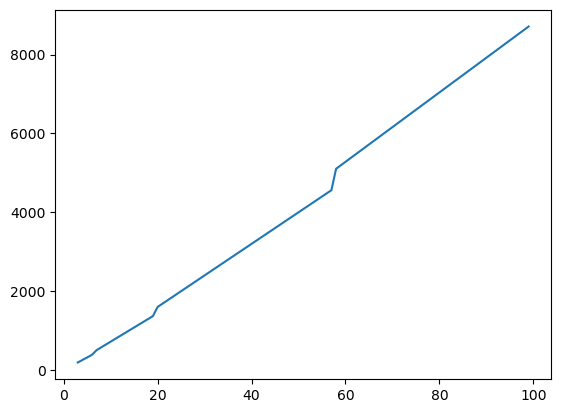

In [16]:
"""
Calculate the number of pairs required for the 339s protocol given code distance

D = code distance
c = confidence threshold
ps = success rate for purification block
np = number of pairs in purification circuit
"""
def pair_count_for_distance(D, c=0.999, ps=0.6659, np=8):
    one_pair_success = c**(1/D)
    num_purifiers = min_trials(ps, one_pair_success, 1, quiet=True)
    return num_purifiers * D * np

# 0.6659, 8
# 0.82, 4
Drange = list(range(3,100))
pairCounts = list(map(pair_count_for_distance, Drange))
print(pairCounts[0:15]) # Print some code distance resource requirements starting from 3
plt.plot(Drange, pairCounts)
plt.show()

In [2]:
# Calculate the success rate of getting a number of bell pairs equal to required_successes

"""
Calculate the success rate of aquiring a number of bell pairs equal to "required_successes"

num_trials = How many times to conduct the experiment
num_timesteps = How many rounds to sample over
num_ions

"""
def multiround_successrate(num_trials, num_timesteps, num_ions, success_prob, required_successes):
    
    def threshold(x):
        if x >= required_successes: return 1;
        return 0
    
    ion_tracking = np.array([num_ions for i in range(num_trials)])
    num_successes = np.zeros(num_trials, int)
    for i in range(num_timesteps):
        collected_photons = np.array([np.random.binomial(ion_tracking[i], success_prob) for i in range(len(ion_tracking))])
        num_successes += collected_photons
        ion_tracking = ion_tracking - collected_photons
    
    print(f"Average number of successes: {np.mean(num_successes)}")
    print(f"Average success rate: {np.mean(list(map(threshold, num_successes)))}")
    return
#     results = list(map(threshold, num_successes))
#     return np.mean(results)

In [83]:
num_trials = 10000
num_timesteps = 1000
num_ions = 9175
success_prob = 2.18e-4
required_successes = 1680
multiround_successrate(num_trials, num_timesteps, num_ions, success_prob, required_successes)

Average number of successes: 1796.8468
Average success rate: 0.9992


In [8]:
num_trials = 10000
num_timesteps = 100000
num_ions = 1680
success_prob = 2.18e-4
required_successes = 1680
multiround_successrate(num_trials, num_timesteps, num_ions, success_prob, required_successes)

Average number of successes: 1680.0
Average success rate: 1.0


In [9]:
num_trials = 1000
num_timesteps = 50000
num_ions = 1680
success_prob = 2.18e-4
required_successes = 1680
multiround_successrate(num_trials, num_timesteps, num_ions, success_prob, required_successes)

Average number of successes: 1679.967
Average success rate: 0.968


In [14]:
num_trials = 1000
num_timesteps = 10000
num_ions = 1950
success_prob = 2.18e-4
required_successes = 1680
multiround_successrate(num_trials, num_timesteps, num_ions, success_prob, required_successes)

Average number of successes: 1729.598
Average success rate: 1.0


In [89]:
num_trials = 1000
num_timesteps = 5750
num_ions = 300
success_prob = 2.18e-4
required_successes = 192
multiround_successrate(num_trials, num_timesteps, num_ions, success_prob, required_successes)

Average number of successes: 213.904
Average success rate: 1.0


In [ ]:
# def lattice_surgery_rate(num_ions, num_pairs_required, success_prob = 2.18e-4):
    
    
    